<a href="https://colab.research.google.com/github/FeurialBlack/Braintester/blob/main/Braintester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RAHUL WASNIK**

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Dataset imported")

Dataset imported


In [108]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Plotting Distribution of scores**

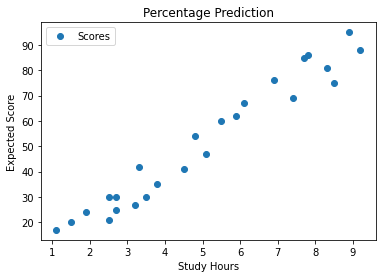

In [109]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Percentage Prediction')  
plt.xlabel('Study Hours')  
plt.ylabel('Expected Score')  
plt.show()

**Simple Linear Regression**

When we have a single input attribute (x) and we want to use linear regression, this is called simple linear regression.

If we had multiple input attributes (e.g. x1, x2, x3, etc.) This would be called multiple linear regression. The procedure for linear regression is different and simpler than that for multiple linear regression, so it is a good place to start.

In this section we are going to create a simple linear regression model from our training data, then make predictions for our training data to get an idea of how well the model learned the relationship in the data.

With simple linear regression we want to model our data as follows:

y = B0 + B1 * x

This is a line where y is the output variable we want to predict, x is the input variable we know and B0 and B1 are coefficients that we need to estimate that move the line around.

Technically, B0 is called the intercept because it determines where the line intercepts the y-axis. In machine learning we can call this the bias, because it is added to offset all predictions that we make. The B1 term is called the slope because it defines the slope of the line or how x translates into a y value before we add our bias.

The goal is to find the best estimates for the coefficients to minimize the errors in predicting y from x.

Simple regression is great, because rather than having to search for values by trial and error or calculate them analytically using more advanced linear algebra, we can estimate them directly from our data.

We can start off by estimating the value for B1 as:

B1 = sum((xi-mean(x)) * (yi-mean(y))) / sum((xi – mean(x))^2)

Where mean() is the average value for the variable in our dataset. The xi and yi refer to the fact that we need to repeat these calculations across all values in our dataset and i refers to the i’th value of x or y.

We can calculate B0 using B1 and some statistics from our dataset, as follows:

B0 = mean(y) – B1 * mean(x)


In [110]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the regression line with Seaborn Library**

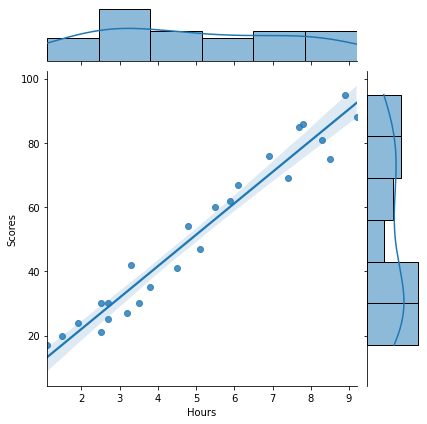

In [111]:
sns.jointplot(x=data['Hours'], y=data['Scores'], data=data, kind='reg')

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error


**Preparing the Data**

In [113]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

In [115]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (5, 1) (20,) (5,)


**Training the Algorithm**

In [116]:
regr = LinearRegression(fit_intercept=True)  
regr.fit(x_train, y_train) 

print("Training completed")

Training completed


**Plotting the regression line with scikit learn**

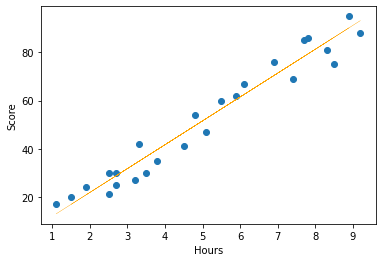

In [127]:
plt.scatter(x, y)
line = regr.coef_*x+regr.intercept_
fig = plt.plot(x, line, lw=0.2, c ='orange',label = 'Regression line');
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

**Making Predictions**

In [128]:
y_pred = regr.predict(x_test) 
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comparing Actual vs Predicted**

In [129]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [130]:
hours = 9.25
own_pred = regr.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the Model Performance**

In [131]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error = {}".format(rmse))

Root Mean Square Error = 4.647447612100373


In [132]:
r2_test = regr.score(x_test,y_test)
r2_train = regr.score(x_train,y_train)
print("R^2 test =  {}".format(r2_test))
print("R^2 train = {}".format(r2_train))

R^2 test =  0.9454906892105354
R^2 train = 0.9515510725211553


**Conclusion :- Students with high number of study hours tend to score more percentage.**